<a href="https://colab.research.google.com/github/furkan-celik/skincancerclassification/blob/master/CS412_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Make sure GPU is on

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Imports

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import random 
import pandas as pd
import os
import shutil
import numpy as np
import cv2
from tensorflow_addons import metrics
from sklearn.model_selection import train_test_split

#To seperate images to folders

In [0]:
import os, shutil
folder = '/content/drive/My Drive/CS412/ImageAugmention/4'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [0]:
SRC_PATH = "/content/drive/My Drive/CS412/Data_SkinCancer/"
DST_PATH_TRAIN = '/content/drive/My Drive/CS412/DatasByFolder/'
i = 0
for index, row in traincsv.iterrows():
  i += 1
  FILE_PATH = SRC_PATH + row["Id"] + ".jpg"
  FOLDER_PATH_TRAIN = DST_PATH_TRAIN + str(row["Category"]) + "/"
  if(not os.path.exists(FOLDER_PATH_TRAIN)):
    os.mkdir(FOLDER_PATH_TRAIN)
  shutil.copy(FILE_PATH, FOLDER_PATH_TRAIN + row["Id"] + ".jpg")

In [0]:
MAIN_PATH = "/content/drive/My Drive/CS412/Data_SkinCancer/"
os.mkdir(MAIN_PATH + "TestData/")
for index, row in testcsv.iterrows():
  FILE_PATH = MAIN_PATH + row["Id"] + ".jpg"
  FOLDER_PATH = MAIN_PATH + "TestData/" + str(row["Category"]) + "/"
  if(not os.path.exists(FOLDER_PATH)):
    os.mkdir(FOLDER_PATH)
  shutil.copy(FILE_PATH, FOLDER_PATH + row["Id"] + ".jpg")

In [0]:
DST_PATH_TRAIN = '/content/drive/My Drive/CS412/DatasByFolder/'
for index in range(0, len(traincsv)):
  if type(traincsv["Id"][index]) == str and traincsv["Id"][index].find("Image") != -1:
    FILE_PATH = DST_PATH_TRAIN + str(traincsv["Category"][index]) + "/" + traincsv["Id"][index] + ".jpg"
    img = cv2.imread(FILE_PATH)
    traincsv["Id"][index] = img
    del img
    print(index)

In [0]:
SRC_PATH = "/content/drive/My Drive/CS412/Data_SkinCancer/"
DST_PATH_TRAIN = '/content/drive/My Drive/CS412/DatasByFolder/'
train_datagen = ImageDataGenerator(
  rotation_range=135,
  width_shift_range=0.4,
  height_shift_range=0.4,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest') # set validation split

for index, row in traincsv.groupby("Category").get_group("4").iterrows():
  saveDir = '/content/drive/My Drive/CS412/ImageAugmention/4/' + str(row["Id"][:len(row["Id"]) - 4])
  if(not os.path.exists(saveDir)):
    os.mkdir(saveDir)

  train_generator = train_datagen.flow_from_dataframe(
          pd.DataFrame({"Id": row["Id"], "Category": row["Category"]}, index=["Id"]),  # This is the source directory for training images
          directory="/content/drive/My Drive/CS412/DatasByFolder/4",
          x_col="Id",
          y_col="Category",
          target_size=(256, 256),  # All images will be resized to 200 x 200
          batch_size=batch_size,
          # Since we use categorical_crossentropy loss, we need categorical labels
          class_mode='categorical',
          save_to_dir=saveDir)
  for i in range(1):
    train_generator.next()


Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 valida

# Gather Data From Files

In [0]:
traincsv = pd.read_csv("/content/drive/My Drive/CS412/Train.csv")
traincsv["Id"] += ".jpg"
#valData4 = traincsv.groupby("Category").get_group(4).reset_index()
#traincsv = traincsv[traincsv.Category != 4].copy()
#for root, dirs, files in os.walk("/content/drive/My Drive/CS412/ImageAugmention/4"):
#  traincsv = traincsv.append(pd.DataFrame({'Id': files,'Category': [4] * len(files)}), ignore_index = True)

for index in range(0, len(traincsv)):
  if(traincsv["Category"][index] != 4):
    traincsv["Id"][index] = "DatasByFolder/" + str(traincsv["Category"][index]) + "/" + traincsv["Id"][index]

#for index in range(0, len(valData4)):
#  valData4["Id"][index] = "DatasByFolder/" + str(valData4["Category"][index]) + "/" + valData4["Id"][index]

traincsv = traincsv.astype({"Id": str, "Category": str})
#valData4 = valData4.astype({"Id": str, "Category": str})
traincsv.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Id,Category
0,DatasByFolder/2/Image_1.jpg,2
1,DatasByFolder/2/Image_2.jpg,2
2,DatasByFolder/5/Image_3.jpg,5
3,DatasByFolder/2/Image_4.jpg,2
4,DatasByFolder/1/Image_5.jpg,1


In [0]:

trainData1, valData1 = train_test_split(traincsv.groupby("Category").get_group("1"), test_size=0.2)
trainData2, valData2 = train_test_split(traincsv.groupby("Category").get_group("2"), test_size=0.2)
trainData3, valData3 = train_test_split(traincsv.groupby("Category").get_group("3"), test_size=0.2)
trainData4, valData4 = train_test_split(traincsv.groupby("Category").get_group("4"), test_size=0.2)
trainData5, valData5 = train_test_split(traincsv.groupby("Category").get_group("5"), test_size=0.2)

In [0]:
trainData = pd.concat([trainData4, trainData1, trainData2.sample(2200), trainData3, trainData4, trainData5])
trainData = trainData.sample(frac=1).reset_index(drop=True)
valData = pd.concat([valData1, valData2, valData3, valData4, valData5])
valData = valData.sample(frac=1).reset_index(drop=True)

#Create from dataframe

We used 224x224 for some of the models as picture size since it game better results in our models. We created a fixed number of augmenatation and saved them to create more augmented images. Above codes does file seperation and this save method on google drive

In [0]:
batch_size = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  fill_mode='nearest') # set validation split

validation_datagen = ImageDataGenerator(rescale=1/255)

def dataGen(_trainData, _valData, _batchSize = 32, _class_mode="categorical"):
  # Flow training images in batches of 128 using train_datagen generator
  _train_generator = train_datagen.flow_from_dataframe(
          _trainData,  # This is the source directory for training images
          directory="/content/drive/My Drive/CS412/",
          x_col="Id",
          y_col="Category",
          target_size=(256, 256),  # All images will be resized to 200 x 200
          batch_size=_batchSize,
          # Since we use categorical_crossentropy loss, we need categorical labels
          class_mode=_class_mode)

  # Flow training images in batches of 128 using train_datagen generator
  _validation_generator = validation_datagen.flow_from_dataframe(
          _valData,  # This is the source directory for training images
          directory="/content/drive/My Drive/CS412/",
          x_col="Id",
          y_col="Category",
          target_size=(256, 256),  # All images will be resized to 200 x 200
          batch_size=_batchSize,
          # Since we use categorical_crossentropy loss, we need categorical labels
          class_mode=_class_mode)

  return _train_generator, _validation_generator

#Create from folder

In [0]:
batch_size = 32
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest') # set validation split

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/CS412/DatasByFolder',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ["1", "2", "3", "4", "5"],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/CS412/ValidationDatas',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ["1", "2", "3", "4", "5"],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 10000 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


#Gather Test Files

In [0]:
testcsv = pd.read_csv("/content/drive/My Drive/CS412/Test.csv")
testcsv.head()

In [0]:
batch_size = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/CS412/TestData',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 200 x 200
        batch_size=50,
        # Specify the classes explicitly
        classes = ["1"],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode=None,
        shuffle=False)

Found 5000 images belonging to 1 classes.


#Inception ResNet Model

In [0]:
from datetime import datetime
%load_ext tensorboard
root_logdir = os.path.join('/content/drive/My Drive/CS412', "final_logs")
%tensorboard --logdir "/content/drive/My Drive/CS412/final_logs/"

In [0]:
resNetModel_base = tf.keras.applications.InceptionResNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
resNetModel_base.trainable = False

resNetModel_base.trainable = True
'''set_trainable = False
for i in range(len(resNetModel_base.layers)):
  if resNetModel_base.layers[i].name.find("block8") != -1:
    set_trainable = True
  
  resNetModel_base.layers[i].trainable = set_trainable'''

resNetModel = tf.keras.models.Sequential([
                                          resNetModel_base,
                                          tf.keras.layers.GlobalAveragePooling2D(),
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2()),
                                          tf.keras.layers.Dense(64, activation="relu"),
                                          tf.keras.layers.Dropout(0.7),
                                          tf.keras.layers.Dense(5, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2())
])

resNetModel.compile(loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(0.0008, 0.9),
    metrics=[metrics.F1Score(5), "acc"])

In [0]:
resNetModel.load_weights("/content/drive/My Drive/CS412/Checkpoints/cpresnet3.ckpt")

In [0]:
from os import walk
from datetime import datetime
from sklearn.utils import class_weight

checkpoint_path = "/content/drive/My Drive/CS412/Checkpoints/cpdense35.ckpt"
checkpoint_path2 = "/content/drive/My Drive/CS412/Checkpoints/cpdense35acc.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

cp_callbackAcc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path2,
                                                    monitor="val_acc",
                                                    mode="max",
                                                    save_weights_only=True,
                                                    save_best_only=True)

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.0001, mode="auto",
  patience=5, verbose=1)

logdir = os.path.join("/content/drive/My Drive/CS412/final_logs", "Dense" + datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

batch_size = 32
testSplit = 0.2
cat1, val1 = train_test_split(traincsv.groupby("Category").get_group("1").sample(2135), test_size=testSplit)
cat2, val2 = train_test_split(traincsv.groupby("Category").get_group("2").sample(2135), test_size=testSplit)
cat3, val3 = train_test_split(traincsv.groupby("Category").get_group("3"), test_size=testSplit)
cat4, val4 = train_test_split(traincsv.groupby("Category").get_group("4"), test_size=testSplit)
cat5, val5 = train_test_split(traincsv.groupby("Category").get_group("5"), test_size=testSplit)
#cat4 = np.array_split(valData4.sample(frac=1), fold_no)

trainData4 = pd.DataFrame({"Id": [""], "Category": [""]})
for _, row in cat4.iterrows():
  if(len(row["Id"]) < 4):
    continue 
  f = []
  for (dirpath, dirnames, filenames) in walk('/content/drive/My Drive/CS412/ImageAugmention/4/' + str(row["Id"][:len(row["Id"]) - 4])):
    trainData4 = trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["4"]}))
    trainData4 = trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["4"]}))
    for filename in filenames:
      trainData4 = trainData4.append(pd.DataFrame({"Id": ["ImageAugmention/4/" + str(row["Id"][:len(row["Id"]) - 4]) + "/" + filename], "Category": ["4"]}))
    trainData4 = trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["4"]}))
trainData4.reset_index(inplace=True, drop=True)

val4.reset_index(inplace=True, drop=True)
for index in range(0, len(val4)):
  val4["Id"][index] = "DatasByFolder/4/" + val4["Id"][index]

histories = []

trainData = pd.concat([cat1, cat2, cat3, trainData4, cat5])
trainData = trainData.sample(frac=1).reset_index(drop=True)
valData = pd.concat([val1, val2, val3, val4, val5])
valData = valData.sample(frac=1).reset_index(drop=True)
train_generator, validation_generator = dataGen(trainData, valData)
class_weights = class_weight.compute_class_weight('balanced',
                                                np.unique(train_generator.labels),
                                                train_generator.labels)

_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3], 4: class_weights[4]}
print(_weights)
n_epochs = 10
history = denseNetModel.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=int(train_generator.n / train_generator.batch_size),  
        epochs=n_epochs,
        class_weight=_weights,
        verbose=1,
        callbacks=[cp_callback, cp_callbackAcc, earlystop_callback])
histories = np.append(histories, history)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="Id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 7765 validated image filenames belonging to 5 classes.
Found 1517 validated image filenames belonging to 5 classes.
{0: 0.9092505854800936, 1: 0.9092505854800936, 2: 1.2199528672427338, 3: 0.7590420332355816, 4: 1.507766990291262}
Epoch 1/10
242/242 [==============================] - ETA: 0s - loss: 1.4664 - f1_score: 0.4809 - acc: 0.4964
Epoch 00001: val_loss improved from inf to 1.05493, saving model to /content/drive/My Drive/CS412/Checkpoints/cpdense35.ckpt
242/242 [==============================] - 317s 1s/step - loss: 1.4664 - f1_score: 0.4809 - acc: 0.4964 - val_loss: 1.0549 - val_f1_score: 0.5459 - val_acc: 0.6396
Epoch 2/10
242/242 [==============================] - ETA: 0s - loss: 1.0548 - f1_score: 0.6198 - acc: 0.6347
Epoch 00002: val_loss improved from 1.05493 to 0.95256, saving model to /content/drive/My Drive/CS412/Checkpoints/cpdense35.ckpt
242/242 [==============================] - 238s 985ms/step - loss: 1.0548 - f1_score: 0.6198 - acc: 0.6347 - val_loss: 0.9526

In [0]:
n_epochs = 10
history = denseNetModel.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=int(train_generator.n / train_generator.batch_size),  
        epochs=n_epochs,
        class_weight=_weights,
        verbose=1,
        callbacks=[cp_callback, cp_callbackAcc, earlystop_callback])
histories = np.append(histories, history)

Epoch 1/10
242/242 [==============================] - ETA: 0s - loss: 0.5875 - f1_score: 0.7969 - acc: 0.8060
Epoch 00001: val_loss did not improve from 0.84235
242/242 [==============================] - 238s 982ms/step - loss: 0.5875 - f1_score: 0.7969 - acc: 0.8060 - val_loss: 0.9705 - val_f1_score: 0.6274 - val_acc: 0.6961
Epoch 2/10
242/242 [==============================] - ETA: 0s - loss: 0.5378 - f1_score: 0.8154 - acc: 0.8234
Epoch 00002: val_loss did not improve from 0.84235
242/242 [==============================] - 237s 978ms/step - loss: 0.5378 - f1_score: 0.8154 - acc: 0.8234 - val_loss: 0.8605 - val_f1_score: 0.6595 - val_acc: 0.7241
Epoch 3/10
242/242 [==============================] - ETA: 0s - loss: 0.4822 - f1_score: 0.8356 - acc: 0.8425
Epoch 00003: val_loss did not improve from 0.84235
242/242 [==============================] - 239s 988ms/step - loss: 0.4822 - f1_score: 0.8356 - acc: 0.8425 - val_loss: 0.9066 - val_f1_score: 0.6758 - val_acc: 0.7207
Epoch 4/10
242/2

In [0]:
denseNetModel.save("/content/drive/My Drive/CS412/Models/densenet6889_model.h5")

Classification Matrix and Reports on Validation Data

In [0]:
classification_generator = validation_datagen.flow_from_dataframe(
          valData,  # This is the source directory for training images
          directory="/content/drive/My Drive/CS412/",
          x_col="Id",
          y_col="Category",
          target_size=(224, 224),  # All images will be resized to 200 x 200
          batch_size=32,
          shuffle = False,
          # Since we use categorical_crossentropy loss, we need categorical labels
          class_mode='categorical')

#denseNetModel.load_weights(checkpoint_path)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = denseNetModel.predict(classification_generator, classification_generator.samples // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(classification_generator.classes, y_pred))
print('Classification Report')
target_names = ['1', '2', '3', '4', '5']
print(classification_report(classification_generator.classes, y_pred, target_names=target_names))

Found 1517 validated image filenames belonging to 5 classes.
Confusion Matrix
[[266  67  34  10  50]
 [ 47 316  18   3  43]
 [  4  10 263  10  32]
 [  7   0  22  36  21]
 [ 25  20  11   9 193]]
Classification Report
              precision    recall  f1-score   support

           1       0.76      0.62      0.69       427
           2       0.77      0.74      0.75       427
           3       0.76      0.82      0.79       319
           4       0.53      0.42      0.47        86
           5       0.57      0.75      0.65       258

    accuracy                           0.71      1517
   macro avg       0.68      0.67      0.67      1517
weighted avg       0.72      0.71      0.71      1517



Performance of each class can be seen in this graph

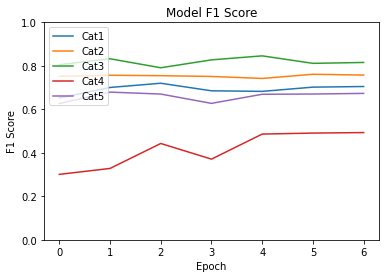

In [0]:
import matplotlib.pyplot as pyplot
# Plot training & validation loss values
bycat = np.transpose(histories[0].history["val_f1_score"])
pyplot.plot(bycat[0])
pyplot.plot(bycat[1])
pyplot.plot(bycat[2])
pyplot.plot(bycat[3])
pyplot.plot(bycat[4])
pyplot.ylim(0,1)
pyplot.title('Model F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch')
pyplot.legend(['Cat1', 'Cat2', "Cat3", "Cat4", "Cat5"], loc='upper left')
pyplot.show()

#DenseNet Model

In [0]:
from sklearn.utils import class_weight

denseNetModel_base = tf.keras.applications.DenseNet201(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
denseNetModel_base.trainable = False

denseNetModel_base.trainable = True
set_trainable = False
for i in range(len(denseNetModel_base.layers)):
  if denseNetModel_base.layers[i].name.find("conv4") != -1:
    set_trainable = True
  
  denseNetModel_base.layers[i].trainable = set_trainable

denseNetModel = tf.keras.models.Sequential([
                                            denseNetModel_base,
                                            tf.keras.layers.GlobalAveragePooling2D(),
                                            tf.keras.layers.Flatten(),
                                            tf.keras.layers.Dropout(0.7),
                                            #tf.keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
                                            tf.keras.layers.Dense(5, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2())
])

denseNetModel.compile(loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(0.0006, 0.9),
    metrics=[metrics.F1Score(5), "acc"])

total_sample=train_generator.n

cat1, val1 = train_test_split(traincsv.groupby("Category").get_group("1").sample(frac=1), test_size=0.2)
cat2, val2 = train_test_split(traincsv.groupby("Category").get_group("2").sample(3200).sample(frac=1), test_size=0.2)
cat3, val3 = train_test_split(traincsv.groupby("Category").get_group("3").sample(frac=1), test_size=0.2)
cat4, val4 = train_test_split(traincsv.groupby("Category").get_group("4").sample(frac=1), test_size=0.2)
cat5, val5 = train_test_split(traincsv.groupby("Category").get_group("5").sample(frac=1), test_size=0.2)

cat4.reset_index(inplace=True, drop=True)
val4.reset_index(inplace=True, drop=True)

for index in range(0, len(cat4)):
  cat4["Id"][index] = "DatasByFolder/4/" + cat4["Id"][index]
  
for index in range(0, len(val4)):
  val4["Id"][index] = "DatasByFolder/4/" + val4["Id"][index]

histories = []

trainData = pd.concat([cat1, cat2, cat3, cat4, cat5])
trainData = trainData.sample(frac=1).reset_index(drop=True)
valData = pd.concat([val1, val2, val3, val4, val5])
valData = valData.sample(frac=1).reset_index(drop=True)
train_generator, validation_generator = dataGen(trainData, valData)

class_weights = class_weight.compute_class_weight('balanced',
                                                np.unique(train_generator.classes),
                                                train_generator.classes)
_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3], 4: class_weights[4]}

n_epochs = 30
history = denseNetModel.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=30,  
        epochs=n_epochs,
        class_weight=_weights,
        verbose=1)
histories = np.append(histories, history)

Found 6967 validated image filenames belonging to 5 classes.
Found 1744 validated image filenames belonging to 5 classes.
Epoch 1/30
30/30 [==============================] - 62s 2s/step - loss: 2.1630 - f1_score: 0.2194 - acc: 0.2450 - val_loss: 1.5254 - val_f1_score: 0.2888 - val_acc: 0.4062
Epoch 2/30
30/30 [==============================] - 55s 2s/step - loss: 1.8144 - f1_score: 0.3399 - acc: 0.4052 - val_loss: 1.3726 - val_f1_score: 0.3332 - val_acc: 0.4519
Epoch 3/30
30/30 [==============================] - 47s 2s/step - loss: 1.5335 - f1_score: 0.3899 - acc: 0.4187 - val_loss: 1.2579 - val_f1_score: 0.3879 - val_acc: 0.4976
Epoch 4/30
30/30 [==============================] - 40s 1s/step - loss: 1.5052 - f1_score: 0.4334 - acc: 0.4771 - val_loss: 1.2049 - val_f1_score: 0.4612 - val_acc: 0.5649
Epoch 5/30
30/30 [==============================] - 41s 1s/step - loss: 1.3876 - f1_score: 0.4331 - acc: 0.4875 - val_loss: 1.0860 - val_f1_score: 0.5792 - val_acc: 0.6466
Epoch 6/30
30/30 [

In [0]:
denseNetModel.load_weights("/content/drive/My Drive/CS412/Models/cpdense.ckpt")

In [0]:
denseNetModel.save("/content/drive/My Drive/CS412/Models/densenet_model.h5")

In [0]:
from datetime import datetime
logdir = os.path.join("final_logs", denseNetModel.name + datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
pred = np.argmax(denseNetModel.predict(test_generator, verbose=1, steps=5000/50), axis=-1)
filenames = test_generator.filenames
for i in range(len(filenames)):
  filenames[i] = filenames[i][2:len(filenames[i])-4]
res = pd.DataFrame({'Id': filenames,'Category': pred + 1})
res.set_index("Id", inplace=True)
res.to_csv("/content/drive/My Drive/CS412/Pred2.csv")

  3/100 [..............................] - ETA: 18:58

#Xception Model

Current xception model guesses binary between 4 or not. The only main difference is last dense layer has 5 in main model. We had no time to revert it and run it again since we used two models. But we can provide saved model as md5

In [0]:
xceptionModel_base = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
xceptionModel_base.trainable = False

xceptionModel_base.trainable = True
set_trainable = False
for i in range(len(xceptionModel_base.layers)):
  if xceptionModel_base.layers[i].name.find("block4_conv1") != -1:
    set_trainable = True
  elif xceptionModel_base.layers[i].name.find("block5_conv1") != -1:
    set_trainable = True
  
  xceptionModel_base.layers[i].trainable = set_trainable

xceptionModel = tf.keras.models.Sequential([
                                            xceptionModel_base,
                                            # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    tf.keras.layers.GlobalAveragePooling2D(),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='sigmoid')
])

xceptionModel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    metrics=[metrics.F1Score(2), "acc"])

In [0]:
from os import walk
from datetime import datetime
from sklearn.utils import class_weight

checkpoint_path = "/content/drive/My Drive/CS412/Checkpoints/xception4.ckpt"
checkpoint_path2 = "/content/drive/My Drive/CS412/Checkpoints/xception4acc.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

cp_callbackAcc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path2,
                                                    monitor="val_acc",
                                                    mode="max",
                                                    save_weights_only=True,
                                                    save_best_only=True)

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.0001, mode="auto",
  patience=5, verbose=1)

logdir = os.path.join("/content/drive/My Drive/CS412/final_logs", "Dense" + datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

batch_size = 32
testSplit = 0.2
_cat1, _val1 = train_test_split(traincsv.groupby("Category").get_group("1").sample(900), test_size=testSplit)
_cat2, _val2 = train_test_split(traincsv.groupby("Category").get_group("2").sample(900), test_size=testSplit)
_cat3, _val3 = train_test_split(traincsv.groupby("Category").get_group("3").sample(900), test_size=testSplit)
_cat4, _val4 = train_test_split(traincsv.groupby("Category").get_group("4"), test_size=testSplit)
_cat5, _val5 = train_test_split(traincsv.groupby("Category").get_group("5").sample(900), test_size=testSplit)
#cat4 = np.array_split(valData4.sample(frac=1), fold_no)

_val4["Category"] = "0"

_cat1["Category"] = "1"
_cat2["Category"] = "1"
_cat3["Category"] = "1"
_cat5["Category"] = "1"
_val1["Category"] = "1"
_val1 = _val1.sample(50)
_val2["Category"] = "1"
_val2 = _val2.sample(50)
_val3["Category"] = "1"
_val3 = _val3.sample(50)
_val5["Category"] = "1"
_val5 = _val5.sample(50)


_trainData4 = pd.DataFrame({"Id": [""], "Category": [""]})
for _, row in _cat4.iterrows():
  if(len(row["Id"]) < 4):
    continue 
  f = []
  for (dirpath, dirnames, filenames) in walk('/content/drive/My Drive/CS412/ImageAugmention/4/' + str(row["Id"][:len(row["Id"]) - 4])):
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    for filename in filenames:
      _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["ImageAugmention/4/" + str(row["Id"][:len(row["Id"]) - 4]) + "/" + filename], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
    _trainData4 = _trainData4.append(pd.DataFrame({"Id": ["DatasByFolder/4/" + str(row["Id"])], "Category": ["0"]}))
_trainData4 = _trainData4[_trainData4.Category != ""]
_trainData4.reset_index(inplace=True, drop=True)

_val4.reset_index(inplace=True, drop=True)
for index in range(0, len(_val4)):
  _val4["Id"][index] = "DatasByFolder/4/" + _val4["Id"][index]
_val4 = pd.concat([_val4, _val4, _val4,])
_val4.reset_index(inplace=True, drop=True)

histories = []

_trainData = pd.concat([_cat1, _cat2, _cat3, _trainData4, _cat5])
_trainData = _trainData.sample(frac=1).reset_index(drop=True)
_valData = pd.concat([_val1, _val2, _val3, _val4, _val5])
_valData = _valData.sample(frac=1).reset_index(drop=True)
train_generator, validation_generator = dataGen(_trainData, _valData)
class_weights = class_weight.compute_class_weight('balanced',
                                                np.unique(train_generator.labels),
                                                train_generator.labels)

#_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3], 4: class_weights[4]}
#print(_weights)
n_epochs = 3
history = xceptionModel.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=30,  
        epochs=n_epochs,
        verbose=1,
        callbacks=[cp_callback, cp_callbackAcc, earlystop_callback])
histories = np.append(histories, history)

Found 6290 validated image filenames belonging to 2 classes.
Found 458 validated image filenames belonging to 2 classes.
Epoch 1/3
30/30 [==============================] - ETA: 0s - loss: 0.6678 - f1_score: 0.5812 - acc: 0.6010
Epoch 00001: val_loss improved from inf to 0.64697, saving model to /content/drive/My Drive/CS412/Checkpoints/xception4.ckpt
30/30 [==============================] - 43s 1s/step - loss: 0.6678 - f1_score: 0.5812 - acc: 0.6010 - val_loss: 0.6470 - val_f1_score: 0.6438 - val_acc: 0.6496
Epoch 2/3
30/30 [==============================] - ETA: 0s - loss: 0.5899 - f1_score: 0.7633 - acc: 0.7667
Epoch 00002: val_loss improved from 0.64697 to 0.64307, saving model to /content/drive/My Drive/CS412/Checkpoints/xception4.ckpt
30/30 [==============================] - 35s 1s/step - loss: 0.5899 - f1_score: 0.7633 - acc: 0.7667 - val_loss: 0.6431 - val_f1_score: 0.6248 - val_acc: 0.6339
Epoch 3/3
30/30 [==============================] - ETA: 0s - loss: 0.5711 - f1_score: 0.7

In [0]:
n_epochs = 3
history = xceptionModel.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=30,  
        epochs=n_epochs,
        verbose=1,
        callbacks=[cp_callback, cp_callbackAcc, earlystop_callback])

Epoch 1/3
30/30 [==============================] - ETA: 0s - loss: 0.4943 - f1_score: 0.8018 - acc: 0.8062
Epoch 00001: val_loss did not improve from 0.53227
30/30 [==============================] - 29s 969ms/step - loss: 0.4943 - f1_score: 0.8018 - acc: 0.8062 - val_loss: 0.5337 - val_f1_score: 0.7807 - val_acc: 0.7812
Epoch 2/3
30/30 [==============================] - ETA: 0s - loss: 0.4900 - f1_score: 0.8093 - acc: 0.8135
Epoch 00002: val_loss improved from 0.53227 to 0.50388, saving model to /content/drive/My Drive/CS412/Checkpoints/xception4.ckpt
30/30 [==============================] - 30s 1s/step - loss: 0.4900 - f1_score: 0.8093 - acc: 0.8135 - val_loss: 0.5039 - val_f1_score: 0.7855 - val_acc: 0.7902
Epoch 3/3
30/30 [==============================] - ETA: 0s - loss: 0.4632 - f1_score: 0.8202 - acc: 0.8229
Epoch 00003: val_loss did not improve from 0.50388
30/30 [==============================] - 29s 976ms/step - loss: 0.4632 - f1_score: 0.8202 - acc: 0.8229 - val_loss: 0.6343 

Classification of 

In [0]:
classification_generator = validation_datagen.flow_from_dataframe(
          _valData,  # This is the source directory for training images
          directory="/content/drive/My Drive/CS412/",
          x_col="Id",
          y_col="Category",
          target_size=(256, 256),  # All images will be resized to 200 x 200
          batch_size=32,
          shuffle = False,
          # Since we use categorical_crossentropy loss, we need categorical labels
          class_mode='categorical')

#denseNetModel.load_weights(checkpoint_path)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = xceptionModel.predict(classification_generator, classification_generator.samples // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(classification_generator.classes, y_pred))
print('Classification Report')
target_names = ['0', '1']
print(classification_report(classification_generator.classes, y_pred, target_names=target_names))

Found 458 validated image filenames belonging to 2 classes.
Confusion Matrix
[[  0 258]
 [  0 200]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.44      1.00      0.61       200

    accuracy                           0.44       458
   macro avg       0.22      0.50      0.30       458
weighted avg       0.19      0.44      0.27       458



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
xceptionModel.save("/content/drive/My Drive/CS412/Models/xception_model_test.h5")

In [0]:
pred = np.argmax(dense.predict(test_generator, verbose=1, steps=5000/50), axis=-1)
filenames = test_generator.filenames
for i in range(len(filenames)):
  filenames[i] = filenames[i][2:len(filenames[i])-4]
res = pd.DataFrame({'Id': filenames,'Category': pred + 1})
res.set_index("Id", inplace=True)
res.to_csv("/content/drive/My Drive/CS412/Pred2.csv")

KeyboardInterrupt: ignored

#Results From K-Fold

In [0]:
acc = []
loss = []
f1 = []
val_acc = []
val_loss = []
val_f1 = []
for history in histories:
  acc = np.append(acc, history.history["acc"])
  val_acc = np.append(val_acc, history.history["val_acc"])
  loss = np.append(loss, history.history["loss"])
  val_loss = np.append(val_loss, history.history["val_loss"])
  f1 = np.append(f1, history.history["f1_score"])
  val_f1 = np.append(val_f1, history.history["val_f1_score"])

#Plot Results

This graphs show current binary classifier for 4 - or not. It is an old iteration and we could not realy worked it at further iterations. Due to dead relu problems

In [0]:
for i in range(len(f1)):
  f1[i] = np.average(f1[i])
  val_f1[i] = np.average(val_f1[i])

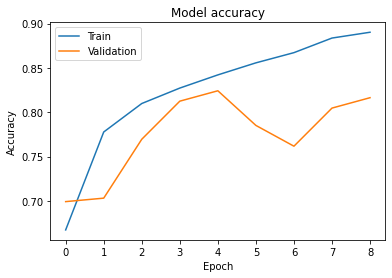

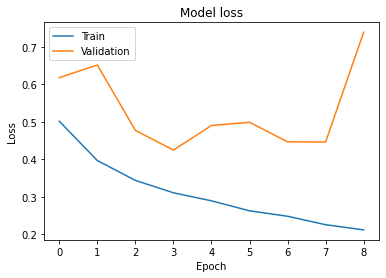

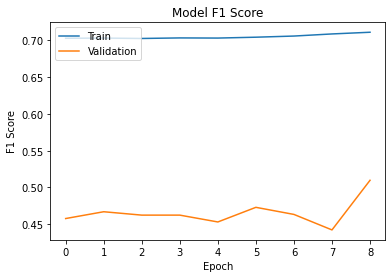

In [0]:
from matplotlib import pyplot

# Plot training & validation accuracy values
pyplot.plot(acc)
pyplot.plot(val_acc)
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Validation'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(loss)
pyplot.plot(val_loss)
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Validation'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(f1)
pyplot.plot(val_f1)
pyplot.title('Model F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Validation'], loc='upper left')
pyplot.show()

#Handmade Model

This is first model of we used

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 128x 128 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(filters=16, strides=(2,2), activation='relu', input_shape=(256, 256, 3), kernel_size=5),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', kernel_size=3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    # The third convolution
    tf.keras.layers.Conv2D(32, strides=2, activation='relu', kernel_size=4),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, strides=2, activation='relu', kernel_size=3),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[metrics.F1Score(5), "acc"])

total_sample=train_generator.n

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.classes),
                                                 train_generator.classes)
_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3], 4: class_weights[4]}

In [0]:
class_weights

array([0.74963131, 0.60045434, 1.03817753, 3.87565982, 1.2831068 ])

This is an old iteration which has very low results. At that point we felt the need of transfer learning

In [0]:
n_epochs = 20
history = model.fit(
        train_generator, 
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        class_weight={0: 0.74963131, 1: 0.60045434, 2: 1.03817753, 3: 3.87565982, 4: 1.2831068},
        verbose=1)

Epoch 1/20
50/50 [==============================] - 757s 15s/step - loss: 1.5559 - f1_score: 0.1752 - acc: 0.2744 - val_loss: 1.3635 - val_f1_score: 0.1923 - val_acc: 0.3359
Epoch 2/20
50/50 [==============================] - 553s 11s/step - loss: 1.5065 - f1_score: 0.2136 - acc: 0.3019 - val_loss: 1.4178 - val_f1_score: 0.1884 - val_acc: 0.2812
Epoch 3/20
50/50 [==============================] - 432s 9s/step - loss: 1.4562 - f1_score: 0.2219 - acc: 0.2988 - val_loss: 1.3759 - val_f1_score: 0.2590 - val_acc: 0.4036
Epoch 4/20
50/50 [==============================] - 320s 6s/step - loss: 1.4415 - f1_score: 0.2880 - acc: 0.3806 - val_loss: 1.3651 - val_f1_score: 0.2342 - val_acc: 0.3255
Epoch 5/20
50/50 [==============================] - 247s 5s/step - loss: 1.3921 - f1_score: 0.2791 - acc: 0.3781 - val_loss: 1.2926 - val_f1_score: 0.2896 - val_acc: 0.4583
Epoch 6/20
50/50 [==============================] - 189s 4s/step - loss: 1.4680 - f1_score: 0.2429 - acc: 0.3088 - val_loss: 1.3506 -

This code gives test scores

In [0]:
pred = np.argmax(model.predict(test_generator, verbose=1, steps=5000/50), axis=-1)

In [0]:
filenames = test_generator.filenames
for i in range(len(filenames)):
  filenames[i] = filenames[i][2:len(filenames[i])-4]

In [0]:
pd.DataFrame({'Id': test_generator.filenames,'Category': pred + 1}, index_col = "Id").to_csv("/content/drive/My Drive/CS412/Pred.csv")

TypeError: ignored

#Ensemble

Hard Voting

In [0]:
labels = []
labels.append(y1)
labels.append(y2)
labels.append(y3)

import scipy
# Ensemble with voting
labels = np.array(labels)
#labels = np.transpose(labels, (1, 0))

In [0]:
labels = scipy.stats.mode(labels)[0]

In [0]:
labels = np.squeeze(labels)

In [0]:
filenames = test_generator.filenames
for i in range(len(filenames)):
  filenames[i] = filenames[i][2:len(filenames[i])-4]
res = pd.DataFrame({'Id': filenames,'Category': labels + 1})
res.set_index("Id", inplace=True)
res.to_csv("/content/drive/My Drive/CS412/Pred2.csv")

Soft Voting

In [0]:
MODELS = [tf.keras.models.load_model("/content/drive/My Drive/CS412/Models/resnetInception6820_model.h5"), 
          tf.keras.models.load_model("/content/drive/My Drive/CS412/Models/densenet6889_model.h5"), 
          tf.keras.models.load_model("/content/drive/My Drive/CS412/Models/xception_model_test.h5")]

In [0]:
MODELS[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1536)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               196736    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                

In [0]:
MODELS[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 8, 8, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1920)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1920)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 9605      
Total params: 18,331,589
Trainable params: 17,724,677
Non-trainable params: 606,912
_________________________________________________________________


In [0]:
MODELS[2].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 20,992,941
Trainable params: 10,147,797
Non-trainable params: 10,845,144
_________________________________

In [0]:
# Predict labels with models
labels = [] # this will contain predictions of each model individually.
for model in MODELS:
    predictionsWithProb = model.predict(test_generator, test_generator.samples // test_generator.batch_size+1, verbose=1)
    predictedLabels = np.argmax(predictionsWithProb, axis=-1)

    tuples = []
    for p in range(0, len(predictedLabels)):
      prediction = predictedLabels[p]
      prob = predictionsWithProb[p][prediction] 
      tuples.append((prediction, prob))

    labels.append(tuples)

100/100 [==============================] - 57s 572ms/step


In [0]:
# Ensemble with soft voting
EnsembledPredictions = []
for i in range(0, test_generator.n):
  pred_1 = labels[0][i][0] # prediction
  prob_1 = labels[0][i][1] # probability

  pred_2 = labels[1][i][0]
  prob_2 = labels[1][i][1]

  pred_3 = labels[2][i][0]
  prob_3 = labels[2][i][1]

  ensembledPrediction = -1

  if (pred_1 == pred_2 == pred_3):
    ensembledPrediction = pred_1

  elif (pred_1 == pred_2):
    avg_prob = (prob_1 + prob_2) / 2

    if prob_3 > avg_prob:
      ensembledPrediction = pred_3
    else:
      ensembledPrediction = pred_1

  elif (pred_1 == pred_3):
    avg_prob = (prob_1 + prob_3) / 2

    if prob_2 > avg_prob:
      ensembledPrediction = pred_2
    else:
      ensembledPrediction = pred_1
  
  elif (pred_2 == pred_3):
    avg_prob = (prob_2 + prob_3) / 2

    if prob_1 > avg_prob:
      ensembledPrediction = pred_1
    else:
      ensembledPrediction = pred_2

  else: # all different predictions
    dummy_prob_list = [prob_1, prob_2, prob_3]
    dummy_pred_list = [pred_1, pred_2, pred_3]

    maxProb = max(dummy_prob_list)
    index = dummy_prob_list.index(maxProb)
    ensembledPrediction = dummy_pred_list[index]

  EnsembledPredictions.append(ensembledPrediction)

In [0]:
# using naive method to 
# perform conversion 
for i in range(0, len(EnsembledPredictions)): 
    EnsembledPredictions[i] = int(EnsembledPredictions[i]) + 1 

In [0]:
res = pd.DataFrame({'Id': filenames,'Category': EnsembledPredictions})
res.set_index("Id", inplace=True)
res.to_csv("/content/drive/My Drive/CS412/Pred2.csv")

Result of soft voting on validation data

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(classification_generator.classes, EnsembledPredictions))
print('Classification Report')
target_names = ['1', '2', '3', '4', '5']
print(classification_report(classification_generator.classes, EnsembledPredictions, target_names=target_names))

Confusion Matrix
[[338  39  19   0  31]
 [ 24 360  14   1  28]
 [  0   5 308   0   6]
 [  1   0  18  61   6]
 [  4   6   9   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       0.92      0.79      0.85       427
           2       0.88      0.84      0.86       427
           3       0.84      0.97      0.90       319
           4       0.98      0.71      0.82        86
           5       0.77      0.93      0.84       258

    accuracy                           0.86      1517
   macro avg       0.88      0.85      0.85      1517
weighted avg       0.87      0.86      0.86      1517

